In [1]:
from sklearn.model_selection import train_test_split

import os
import pandas as pd

# classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import sys
sys.path.insert(0, '../')

from TextLabeller import *
from plotting import *

%matplotlib inline

In [2]:
from plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

In [3]:
def classify(x, y, train_test_ratio):

    x_train, test, train_labels, test_labels = train_test_split(x, y, test_size = train_test_ratio)

    print('input dimensions:', len(x), '|', 'output dimensions:', len(y))
    print('x_train dimensions:', len(x_train), '|', 'y_train dimensions:', len(train_labels))
    print('x_test dimensions:', len(test), '|', 'y_test dimensions:', len(test_labels)) 

    # Initialize classifier
    rfc = RandomForestClassifier()
#     from sklearn.naive_bayes import GaussianNB
#     rfc = GaussianNB()

    # Train classifier
    model = rfc.fit(x_train, train_labels)

    # Make predictions
    y_preds = rfc.predict(test)

    # Evaluate model
    print(classification_report(test_labels, y_preds))
    print(accuracy_score(test_labels, y_preds))
    print(confusion_matrix(test_labels, y_preds))
    
    return test_labels, y_preds


# ROC Curve
def plot_roc_curve(test_labels, y_preds):
    fpr, tpr, threshold = roc_curve(test_labels, y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

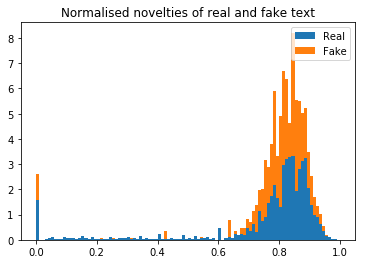

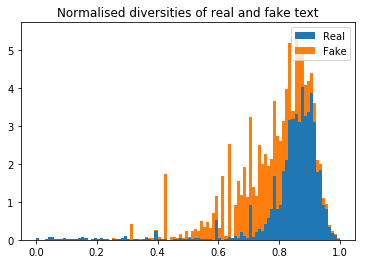

In [4]:
def normalize(distances):
    """
    """
    min_val, max_val = min(distances), max(distances)
    return [(val - 0) / (max_val - 0) for val in distances]

from utils import read_list, normal_distribution, get_scatter_plot, inverse_distances, normed_dists_to_sims

# Initial jaccard similarities
jac_real_diversities = read_list('jaccard_diversities_real.txt')
jac_real_novelties = read_list('jaccard_novelties_real.txt')
jac_fake_diversities = read_list('jaccard_diversities_fake3.txt')
jac_fake_novelties = read_list('jaccard_novelties_fake3.txt')

# Transform distances to similarities
jac_real_diversities = normalize(jac_real_diversities)
jac_real_novelties = normalize(jac_real_novelties)
jac_fake_diversities = normalize(jac_fake_diversities)
jac_fake_novelties = normalize(jac_fake_novelties)

def stacked_hist(data, name):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
    plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=100
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper right")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

# Novelties of real and fake text using jaccard similarity metric
jac_novs = combine_real_fake(jac_real_novelties, jac_fake_novelties)
stacked_hist(jac_novs, "Normalised novelties of real and fake text")

# Diversities of real and fake text using jaccard similarity metric
jac_divs = combine_real_fake(jac_real_diversities, jac_fake_diversities)
stacked_hist(jac_divs, "Normalised diversities of real and fake text")

In [5]:
METRIC = "jaccard"

labelled_real=f'{METRIC}_labelled_real_text.csv'
labelled_fake=f'{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

# display(fake_data.head(10))

# fake_data = fake_data[len(real_data['text'].split()) >= 20]

combined_data = real_data.append(fake_data)

y = combined_data['label'].values
print(y)

csvjac_novs = combine_real_fake(real_data['novelty'], fake_data['novelty'])
# stacked_hist(csvjac_novs, "Novelties of real and fake text")


csvjac_divs = combine_real_fake(real_data['diversity'], fake_data['diversity'])
# stacked_hist(csvjac_divs, "Diversities of real and fake text")

from IPython.display import display, HTML

display(combined_data[10402:10500:3])

# combined_data.tail(10)

[1 1 1 ... 0 0 0]


,index,text,novelty,diversity,label
10773,10773,The scientists found there was an average redu...,0.750000,0.780488,1
10776,10776,We still want to engage and work with them bec...,0.657143,0.729730,1
10779,10779,The cost of watching football has become a maj...,0.769231,0.794872,1
10782,10782,"We ' ve had lots of possession , lots of situa...",0.600000,0.666667,1
0,0,the scottish government has won and not necess...,0.718750,0.645161,0
3,3,"`` it took me , but that is a good thing , but...",0.600000,0.407407,0
6,6,"it is a better option that ' s a brexit , or m...",0.687500,0.666667,0
9,9,`` the only thing that you are able to do anyt...,0.558824,0.500000,0
12,12,"in the end of this season , and leaving the wo...",0.611111,0.600000,0
15,15,we ' re going to play in a few games at the mo...,0.641026,0.575758,0


## Classify using both novelty and diversity

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      1019
          1       0.93      0.92      0.92      1048

avg / total       0.92      0.92      0.92      2067

0.9240445089501693
[[942  77]
 [ 80 968]]


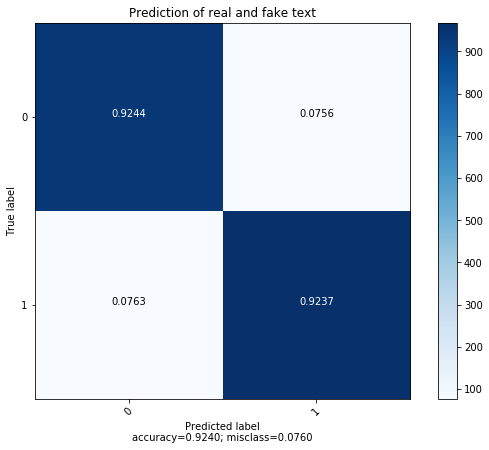

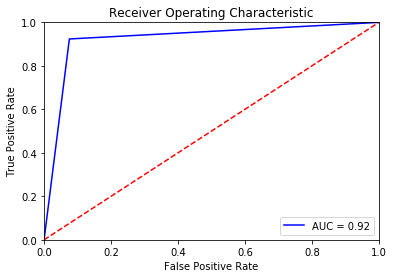

In [6]:
novs = combined_data['novelty'].values
divs = combined_data['diversity'].values

novs_divs_x = list()
for ix, nov in enumerate(novs):
    novs_divs_x.append([nov, divs[ix]])

test_labels, y_preds = classify(novs_divs_x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

In [7]:
# novs = combined_data['novelty'].values
# divs = combined_data['diversity'].values

# x = list()
# for ix, nov in enumerate(novs):
#     x.append([nov, divs[ix]])

# test_labels, y_preds = classify(x, y, 0.1)

# cv = StratifiedKFold(n_splits=5, random_state=123, shuffle=True)
# results = y
# fprs, tprs, scores = [], [], []
    
# for (train, test), i in zip(cv.split(x, y), range(5)):
#     clf.fit(X.iloc[train], y.iloc[train])
#     _, _, auc_score_train = compute_roc_auc(train)
#     fpr, tpr, auc_score = compute_roc_auc(test)
#     scores.append((auc_score_train, auc_score))
#     fprs.append(fpr)
#     tprs.append(tpr)

# plot_roc_curve(fprs, tprs);
# pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

## Classify using only novelty

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
             precision    recall  f1-score   support

          0       0.66      0.74      0.70      1019
          1       0.71      0.63      0.67      1048

avg / total       0.68      0.68      0.68      2067

0.6811804547653604
[[752 267]
 [392 656]]


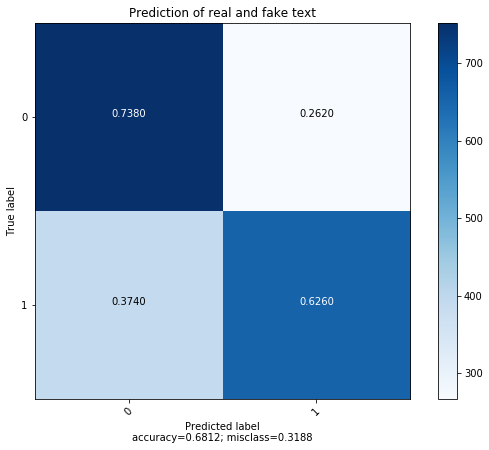

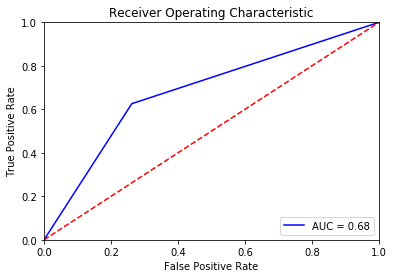

In [8]:
novs = combined_data['novelty'].values

novs_x = list()
for ix, nov in enumerate(novs):
    novs_x.append([nov])

test_labels, y_preds = classify(novs_x, y, 0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

## Classify using only diversity

input dimensions: 20670 | output dimensions: 20670
x_train dimensions: 18603 | y_train dimensions: 18603
x_test dimensions: 2067 | y_test dimensions: 2067
             precision    recall  f1-score   support

          0       0.88      0.89      0.88      1075
          1       0.88      0.86      0.87       992

avg / total       0.88      0.88      0.88      2067

0.8776003870343493
[[956 119]
 [134 858]]


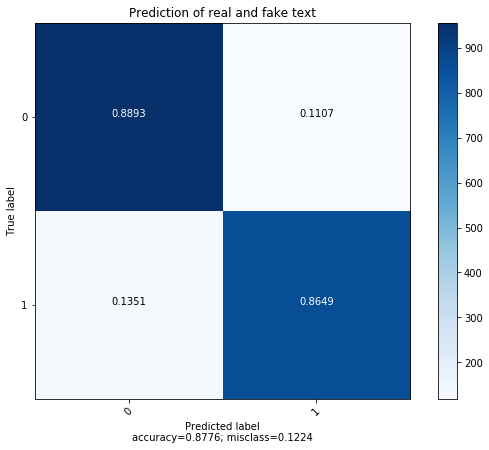

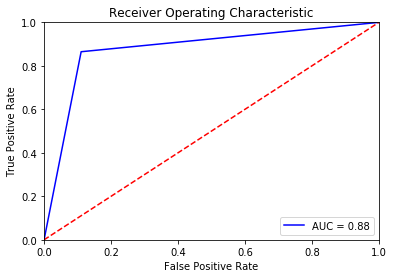

In [9]:
divs = combined_data['diversity'].values

divs_x = list()
for ix, div in enumerate(divs):
    divs_x.append([div])

test_labels, y_preds = classify(divs_x, y, train_test_ratio=0.1)

plot_confusion_matrix(cm           = confusion_matrix(test_labels, y_preds), # confusion matrix created by sklearn.metrics.confusion_matrix
                      normalize    = True,                # show proportions
                      target_names = [0, 1],       # list of names of the classes
                      title        = 'Prediction of real and fake text') # title of graph
    
plot_roc_curve(test_labels=test_labels, y_preds=y_preds)

[[0.6551724137931034], [0.5588235294117647], [0.6097560975609756], [0.7428571428571429], [0.7179487179487181], [0.6052631578947368], [0.6666666666666667], [0.71875], [0.5185185185185186], [0.725]] [0 0 0 1 1 0 0 0 0 1]
[0.42858614 0.82270531 0.23514558 ... 0.77887081 1.         0.14919012]
[[0.625], [0.7575757575757576], [0.7083333333333333], [0.5], [0.736842105263158], [0.736842105263158], [0.6764705882352942], [0.6666666666666667], [0.5625], [0.78125]] [0 1 1 0 1 1 0 1 0 1]
[0.84019509 0.06460057 0.0159816  ... 0.         0.98901814 0.10984127]
[[0.71875, 0.7777777777777778], [0.6764705882352942, 0.6666666666666667], [0.6764705882352942, 0.71875], [0.6842105263157895, 0.7450980392156863], [0.6363636363636364, 0.5757575757575757], [0.6842105263157895, 0.7407407407407407], [0.6857142857142857, 0.7179487179487181], [0.7692307692307692, 0.8222222222222222], [0.5357142857142857, 0.44], [0.7142857142857143, 0.7297297297297297]] [1 0 1 1 0 1 1 1 0 1]
[1.         1.         1.         ... 0.

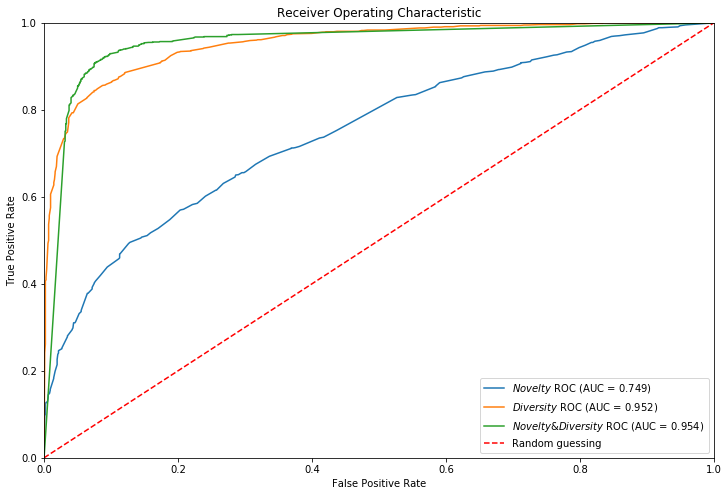

In [14]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

model = RandomForestClassifier()

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': '$Novelty$',
    'model': model,
    'metric': novs_x
},
{
    'label': '$Diversity$',
    'model': model,
    'metric': divs_x
},
    {
    'label': '$Novelty & Diversity$',
    'model': model,
    'metric': novs_divs_x
},
]

# print(metrics[0])

# Below for loop iterates through your models list
for m in metrics:
    model = model # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    print(x_train[:10], y_train[:10])
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data
    
    print(y_preds)

    fpr, tpr, _ = roc_curve(y_test, y_preds)
#     print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
#     print(roc_auc)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

fig.set_figheight(8)
fig.set_figwidth(12)
plt.show()   # Display



[[0.6451612903225806], [0.7073170731707317], [0.7352941176470589], [0.6216216216216216], [0.7708333333333334], [0.625], [0.7241379310344828], [0.725], [0.6666666666666667], [0.6744186046511628]] [0 1 1 0 1 1 1 1 0 1]
[[0.6], [0.5555555555555556], [0.5357142857142857], [0.4347826086956522], [0.6571428571428571], [0.6111111111111112], [0.5454545454545454], [0.6666666666666667], [0.6923076923076923], [0.7894736842105263]] [1 0 0 0 0 0 0 0 1 1]


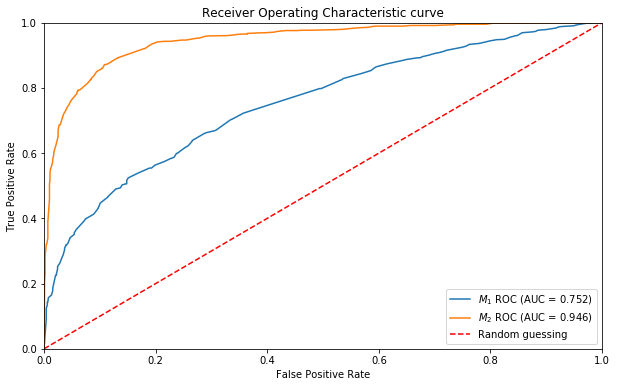

In [16]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

model = RandomForestClassifier()

fig = plt.figure()

# Add the models to the list that you want to view on the ROC plot
metrics = [
{
    'label': '$M_1$',
    'model': model,
    'metric': novs_x
},
{
    'label': '$M_2$',
    'model': model,
    'metric': divs_x
},
#     {
#     'label': '$Novelty & Diversity$',
#     'model': model,
#     'metric': novs_divs_x
# },
]

# print(metrics[0])

# Below for loop iterates through your models list
for m in metrics:
    model = model # select the model
    x = m['metric']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
    print(x_train[:10], y_train[:10])
    model.fit(x_train, y_train) # train the model
    y_preds=model.predict_proba(x_test)[:,1] # predict the test data

    fpr, tpr, _ = roc_curve(y_test, y_preds)
#     print(fpr, tpr)
    roc_auc = auc(fpr, tpr)
#     print(roc_auc)
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.3f)' % (m['label'], roc_auc))
    
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve')
plt.legend(loc="lower right")
fig.set_figheight(6)
fig.set_figwidth(10)
plt.show()   # Display
